In [1]:
import sys
sys.path.insert(1, '../../ana_tools')
import getters, tools, graphic_tools, setters
import matplotlib.pyplot as plt
plt.style.use('../../ana_tools/presentation.mplstyle')
import numpy as np
path = "/eos/user/j/jcapotor/FBGana/camara_climatica/MarchRuns/"
plateaus = getters.get_plateaus()
colors = {"Wav1-1":"blue", "Wav1-2":"orange", "Wav1-3":"red", "Wav1-4":"green",
          "Wav2-1":"yellow", "Wav2-2":"black", "Wav2-3":"grey", "Wav2-4":"purple", "Wav2-5":"darkred"}

/eos/home-j/jcapotor/SWAN_projects/FBG_TMS
/eos/home-j/jcapotor/SWAN_projects/FBG_TMS/ana_tools/plateaus.json


Keys to read: ['10Av1', '11Av1', '1Av1', '1Av2', '2Av1', '2Av2', '3Av1', '3Av2', '4Av1', '4Av2', '5Av1', '5Av2', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 16/16 [00:02<00:00,  5.48it/s]


Keys to read: ['10Av3', '1Av1', '1Av2', '1Av3', '1Av4', '2Av1', '2Av3', '2Av4', '3Av1', '3Av3', '3Av4', '4Av1', '4Av3', '4Av4', '5Av3', '5Av4', '6Av3', '7Av3', '8Av3', '9Av3']


Reading peaks key: Av: 100%|██████████| 20/20 [04:23<00:00, 13.16s/it]


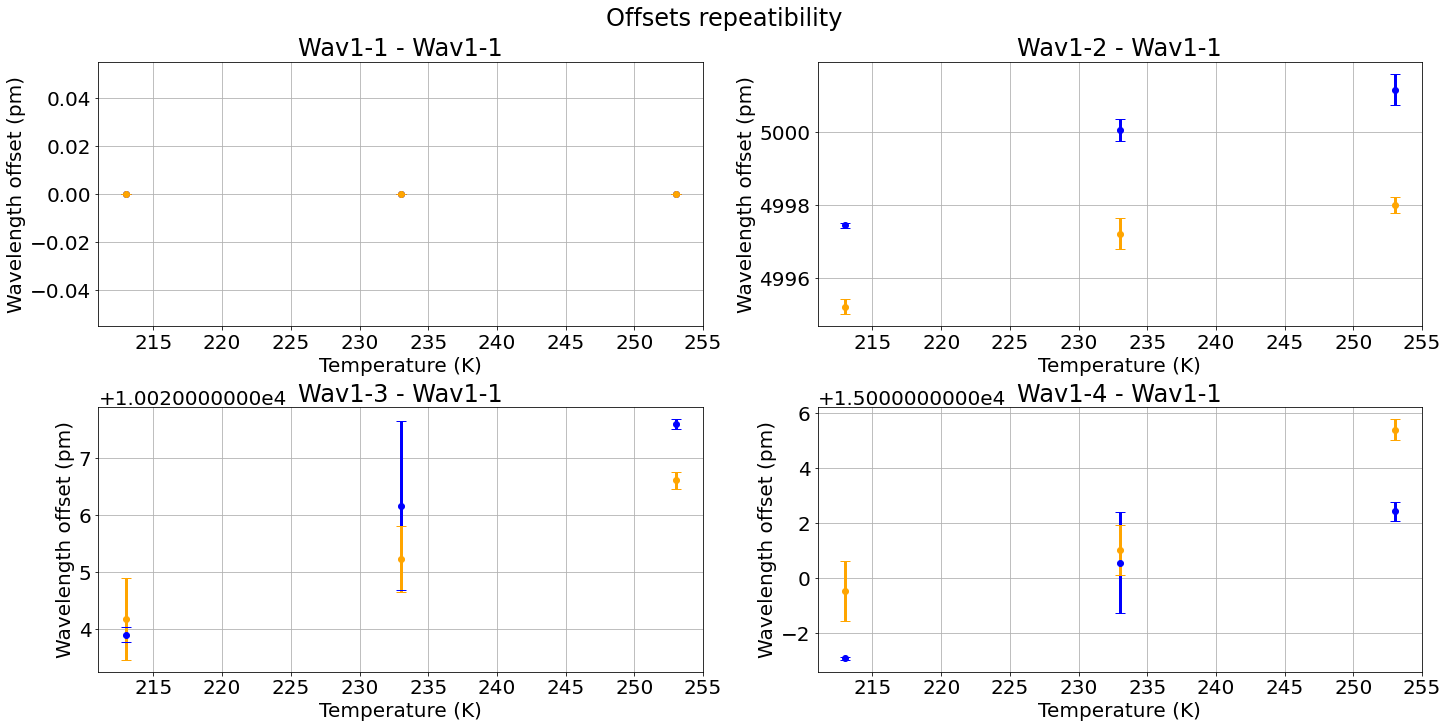

In [2]:
dates = ["20230321", "20230322", "20230329"]
colors = {"20230321":"blue", "20230322":"orange", "20230329":"red"}
fig, axes = graphic_tools.make_figure(ncols=2, nrows=2)
fig.set_size_inches(20, 10)
fig.suptitle("Offsets repeatibility")
for date in dates:
    if date == "20230329":
        continue
    peaks = getters.get_raw_data(path_to_split=path+date+"/", filetype="peaks", pol="Av").sort_values(by="Timestamp").reset_index(drop=True)
    for plateau in plateaus[date]:
        if plateau == "273_down":
            continue
        cnt = 0
        t0 = plateaus[date][plateau][0]
        tf = plateaus[date][plateau][1]
        pcut = peaks.loc[(peaks["Timestamp"]>t0) & (peaks["Timestamp"]<tf)].reset_index(drop=True)
        for sens in peaks.columns:
            if sens == "Timestamp" or sens[3]=="2":
                continue
            axes[cnt].errorbar(int(plateau.split("_")[0]),
                             1e12*np.mean(pcut[sens]-pcut["Wav1-1"]),
                               fmt="o",
                               yerr=1e12*np.std(pcut[sens]-pcut["Wav1-1"]),
                               capsize=5,
                             color=colors[date])
            axes[cnt].set_title(sens + " - Wav1-1")
            axes[cnt].set_xlabel("Temperature (K)")
            axes[cnt].set_ylabel("Wavelength offset (pm)")
            cnt += 1

Keys to read: ['10Av0', '11Av0', '12Av0', '13Av0', '14Av0', '15Av0', '16Av0', '17Av0', '1Av0', '2Av0', '3Av0', '4Av0', '5Av0', '6Av0', '7Av0', '8Av0', '9Av0']


Reading peaks key: Av: 100%|██████████| 17/17 [00:32<00:00,  1.89s/it]


Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '19Av1', '1Av1', '20Av1', '21Av1', '22Av1', '23Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 23/23 [01:24<00:00,  3.68s/it]


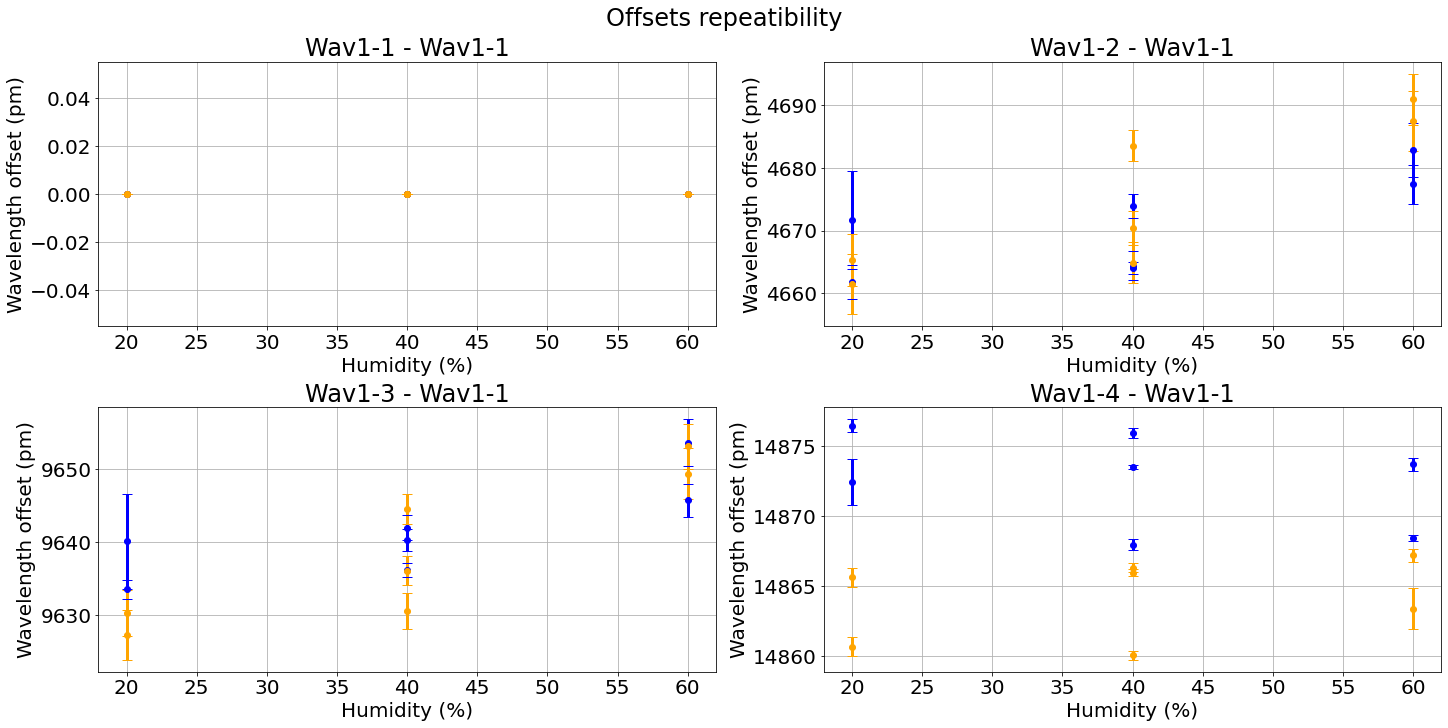

In [3]:
dates = ["20230323", "20230327", "20230328"]
colors = {"20230323":"blue", "20230327":"orange", "20230328":"red"}
fig, axes = graphic_tools.make_figure(ncols=2, nrows=2)
fig.set_size_inches(20, 10)
fig.suptitle("Offsets repeatibility")
for date in dates:
    if date == "20230328":
        continue
    peaks = getters.get_raw_data(path_to_split=path+date+"/", filetype="peaks", pol="Av").sort_values(by="Timestamp").reset_index(drop=True)
    for plateau in plateaus[date]:
        cnt = 0
        t0 = plateaus[date][plateau][0]
        tf = plateaus[date][plateau][1]
        pcut = peaks.loc[(peaks["Timestamp"]>t0) & (peaks["Timestamp"]<tf)].reset_index(drop=True)
        for sens in peaks.columns:
            if sens == "Timestamp" or sens[3]=="2":
                continue
            axes[cnt].errorbar(int(plateau.split("_")[0]),
                             1e12*np.mean(pcut[sens]-pcut["Wav1-1"]),
                               fmt="o",
                               yerr=1e12*np.std(pcut[sens]-pcut["Wav1-1"]),
                               capsize=5,
                             color=colors[date])
            axes[cnt].set_title(sens + " - Wav1-1")
            axes[cnt].set_xlabel("Humidity (%)")
            axes[cnt].set_ylabel("Wavelength offset (pm)")
            cnt += 1

Keys to read: ['10Av0', '11Av0', '12Av0', '13Av0', '14Av0', '15Av0', '16Av0', '17Av0', '1Av0', '2Av0', '3Av0', '4Av0', '5Av0', '6Av0', '7Av0', '8Av0', '9Av0']


Reading peaks key: Av: 100%|██████████| 17/17 [00:03<00:00,  4.67it/s]


Keys to read: ['10Av1', '11Av1', '12Av1', '13Av1', '14Av1', '15Av1', '16Av1', '17Av1', '18Av1', '19Av1', '1Av1', '20Av1', '21Av1', '22Av1', '23Av1', '2Av1', '3Av1', '4Av1', '5Av1', '6Av1', '7Av1', '8Av1', '9Av1']


Reading peaks key: Av: 100%|██████████| 23/23 [00:06<00:00,  3.69it/s]


Keys to read: ['10Av2', '11Av2', '12Av2', '13Av2', '14Av2', '1Av1', '1Av2', '2Av1', '2Av2', '3Av1', '3Av2', '4Av1', '4Av2', '5Av2', '6Av2', '7Av2', '8Av2', '9Av2']


Reading peaks key: Av: 100%|██████████| 18/18 [01:37<00:00,  5.40s/it]


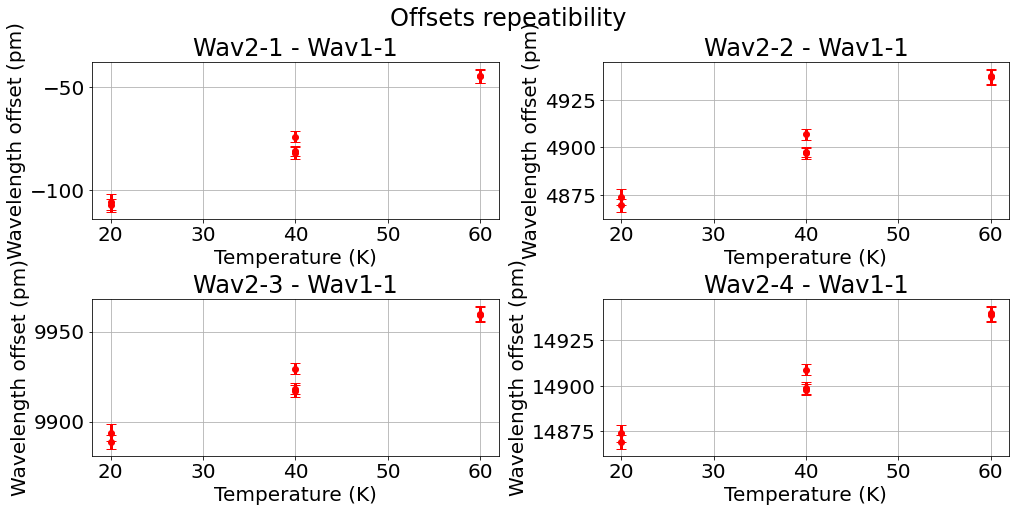

In [4]:
dates = ["20230323", "20230327", "20230328"]
colors = {"20230323":"blue", "20230327":"orange", "20230328":"red"}
fig, axes = graphic_tools.make_figure(ncols=2, nrows=2)
fig.set_size_inches(14, 7)
fig.suptitle("Offsets repeatibility")
for date in dates:
    peaks = getters.get_raw_data(path_to_split=path+date+"/", filetype="peaks", pol="Av").sort_values(by="Timestamp").reset_index(drop=True)
    for plateau in plateaus[date]:
        cnt = 0
        t0 = plateaus[date][plateau][0]
        tf = plateaus[date][plateau][1]
        pcut = peaks.loc[(peaks["Timestamp"]>t0) & (peaks["Timestamp"]<tf)].reset_index(drop=True)
        for sens in peaks.columns:
            if sens == "Timestamp" or sens[3]=="1":
                continue
            axes[cnt].errorbar(int(plateau.split("_")[0]),
                             1e12*np.mean(pcut[sens]-pcut["Wav1-1"]),
                               fmt="o",
                               yerr=1e12*np.std(pcut[sens]-pcut["Wav1-1"]),
                               capsize=5,
                             color=colors[date])
            axes[cnt].set_title(sens + " - Wav1-1")
            axes[cnt].set_xlabel("Temperature (K)")
            axes[cnt].set_ylabel("Wavelength offset (pm)")
            cnt += 1